# Biodiversity in National Park Analysis

## Project Overview
For this project, you will interpret data from the National Parks Service about endangered species in different parks.

You will perform some data analysis on the conservation statuses of these species and investigate if there are any patterns or themes to the types of species that become endangered. During this project, you will analyze, clean up, and plot data as well as pose questions and seek to answer them in a meaningful way.


## Project Goals
Our goal is to analyze the data provided and create visualizations that communicate findings on these questions:
+ What is the distribution of conservation status for categories of species reported?
+ What does biodiversity status look like at each reported national park? 
+ Which national park has the most at-risk biodiversity?
+ Are there significant differences between species conservation status? Which species are more at-risk of endangerment?

## Data Preparation

### Loading the data

Our datasets are provided in two csv files: 
+ `observations.csv`: contains scientific name, park name, and observation counts
+ `species_info.csv`: contains specie category, scientific name, common name, and conservation status

First, we will load these files into two pandas dataframes called `observations` and `species`, respectively.

In [170]:
#import Python modules
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

#Load observations data
observations = pd.read_csv('observations.csv')
observations.head()

scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85

In [171]:
#Load species data
species = pd.read_csv('species_info.csv')
species.head()

category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN

Next, let's investigate the data characteristics of each of our dataframes. We can use .info() method to do this.
+ observations: 23296 rows, 3 columns, no null values in any column
+ species: 5824 rows,4 columns, null values in conservation_status column

In [172]:
observations.info()
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


### Explore Data

#### `observations data`
Let's explore our observations data. We want to know how many national parks were included in the study, and we also want to know which species had the highest and lowest observation count.


+ **There are 4 national parks reported: Great Smoky Mountains, Yosemite, Bryce, and Yellowstone.**
+ **Highest observation count: Lycopodium tristachyum, Yellowstone National Park, 321**
+ **Lowest observation count: Corydalis aurea, Bryce National Park, 9**


In [173]:
#Find unique values for national park
national_parks = observations.park_name.unique()
num_national_parks = observations.park_name.nunique()

print(national_parks, num_national_parks)

['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park'] 4


In [174]:
# Species with the highest observation count
observations[observations.observations == observations.observations.max()]

scientific_name                  park_name  observations
11281  Lycopodium tristachyum  Yellowstone National Park           321

In [175]:
# Species with the lowest observation count
observations[observations.observations == observations.observations.min()]

scientific_name            park_name  observations
9418  Corydalis aurea  Bryce National Park             9

#### `species data`
Next, let's explore our species data. We want to find out the following information: 

+ **How many unique species are there?**
+ **How many unique categories are there? How many species under each category?**
+ **What are the conservation statuses reported? How many species are under each status?**


In [176]:
# number of unique species
print(species.scientific_name.nunique())

5541


In [177]:
# num of unique categories
print(species.category.nunique())

#unique categories
print(species.category.unique())

# num species under each category
species.groupby('category').size()

7
['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

In [178]:
#conservation status
print(species.conservation_status.unique())
print(f"na values:{species.conservation_status.isna().sum()}")
species.groupby('conservation_status').size()

[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']
na values:5633


conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64

### Cleaning the data
We noticed that the **conservation_status** column has 5633 "missing" value (i.e. Nan). These values are not actually missing, rather they denote that the species in question is not under a protected status. We'll replace these Nan values with "Not Concerned".

In [179]:
#Replace nan values in conservation_status in species table
species.conservation_status.fillna('Not Concerned', inplace=True)
species.groupby('conservation_status').size()

conservation_status
Endangered              16
In Recovery              4
Not Concerned         5633
Species of Concern     161
Threatened              10
dtype: int64

## Data Analysis

### What is the distribution of conservation status for categories of species reported?
We're interested in seeing how many of each species categories are under each conservation status. This may help us understand if certain category is more endangered than others.

In [180]:
#Pivot table of category and conservation status (count)

categoryStatus = pd.pivot_table(species,
                                values=['scientific_name'],
                                index=['conservation_status'],
                                columns=['category'],
                                aggfunc=len,
                                dropna=True, fill_value=0)

categoryStatus

scientific_name                                     \
category                  Amphibian Bird Fish Mammal Nonvascular Plant   
conservation_status                                                      
Endangered                        1    4    3      7                 0   
In Recovery                       0    3    0      1                 0   
Not Concerned                    73  442  116    176               328   
Species of Concern                4   72    4     28                 5   
Threatened                        2    0    4      2                 0   

                                            
category            Reptile Vascular Plant  
conservation_status                         
Endangered                0              1  
In Recovery               0              0  
Not Concerned            74           4424  
Species of Concern        5             43  
Threatened                0              2

Of the 16 endangered species, 7 are Mammal. There are also 28 mammal species that are of concern. 
Vascular Plant and Amphibian have the least amount of species under `Endangered` status.

Next, we want to know what percentage of each species is under `Endangered`, `Species of Concern`, and `Threatened` statuses. To do this, we will transform the pivot table above to show percentage of column total.

In [181]:
#Pivot table of category and conservation status (pct)

pctCategoryStatus = categoryStatus.apply(lambda x: x*100/sum(x))

pctCategoryStatus

scientific_name                                   \
category                  Amphibian       Bird       Fish     Mammal   
conservation_status                                                    
Endangered                     1.25   0.767754   2.362205   3.271028   
In Recovery                    0.00   0.575816   0.000000   0.467290   
Not Concerned                 91.25  84.836852  91.338583  82.242991   
Species of Concern             5.00  13.819578   3.149606  13.084112   
Threatened                     2.50   0.000000   3.149606   0.934579   

                                                                 
category            Nonvascular Plant    Reptile Vascular Plant  
conservation_status                                              
Endangered                   0.000000   0.000000       0.022371  
In Recovery                  0.000000   0.000000       0.000000  
Not Concerned               98.498498  93.670886      98.970917  
Species of Concern           1.501502   6.329114       0.961969  
Threatened                   0.000000   0.000000       0.044743

+ `Mammal` has the highest percentage of species under `Endangered` status at 3.27%, followed by `Bird` at 2.36%.
+ The same trend holds for `Species of concern`, with `Bird` having the highest share of spiecies under this status at 13.81%. `Mammal` is a close second at 13.08%.
+ For `Threated` status, `Fish` has the higest share of species at 3.14%.
+ For all categories reported, the majority of species are not under a protected status.

Next, let's visualize this data so it is easier to understand. We will use a stacked bar chart.

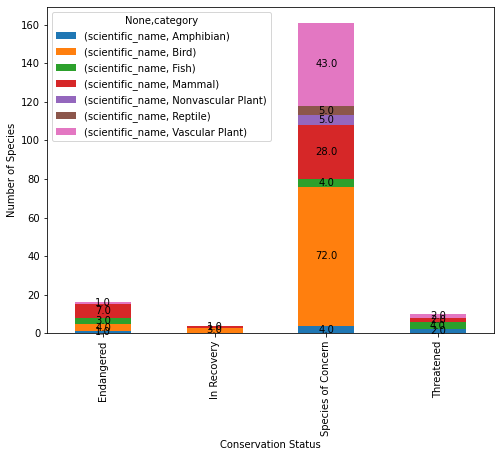

In [182]:
plotcategoryStatus = pd.pivot_table(species[species.conservation_status != 'Not Concerned'],
                                values=['scientific_name'],
                                index=['conservation_status'],
                                columns=['category'],
                                aggfunc=len,
                                dropna=True, fill_value=0)

ax = plotcategoryStatus.plot(kind = 'bar', figsize=(8,6), stacked=True)
ax.set_xlabel('Conservation Status')
ax.set_ylabel('Number of Species')
for c in ax.containers:
    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels, label_type='center')

### What does biodiversity status look like at each reported national park?
Next we're interested in exploring the level of biodiversity at each of the 4 national park reported. We can do this by exploring and visualizing the observation count of species in each national park.

In [183]:
#Total observation count by park
observationPark = observations.groupby('park_name').sum('observation')

observationPark

observations
park_name                                        
Bryce National Park                        576025
Great Smoky Mountains National Park        431820
Yellowstone National Park                 1443562
Yosemite National Park                     863332

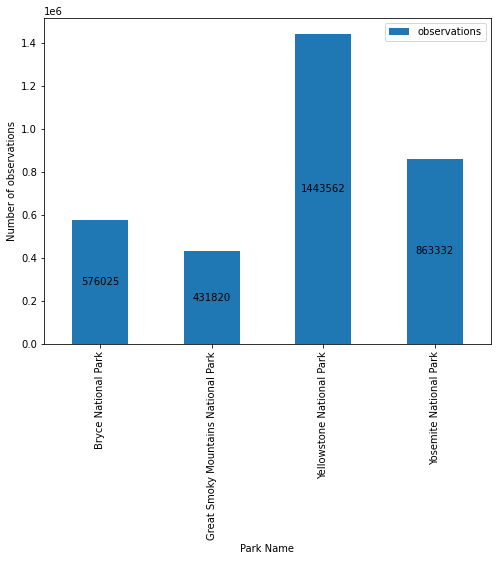

In [184]:
#Bar chart total observation counts by park
ax = observationPark.plot(kind = 'bar', figsize=(8,6))
ax.set_xlabel('Park Name')
ax.set_ylabel('Number of observations')

for c in ax.containers:
    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels, label_type='center')

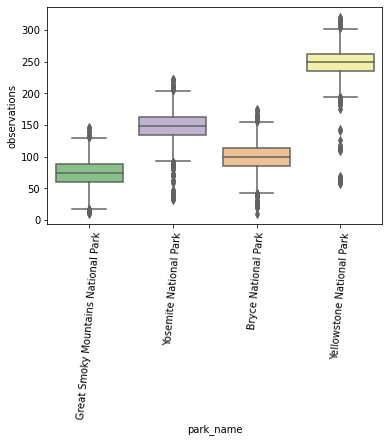

In [185]:
#Box plot observation counts by park
ax = sns.boxplot(x='park_name', y='observations', data=observations, palette='Accent')
ax.set_xticklabels(ax.get_xticklabels(),rotation=85)


plt.show()

Yellowstone National Park has the highest number of observations and also has the largest range among all 4 parks reported.

### Which national park has the most at-risk biodiversity?

We want to find out from the data provided which national park has the most at-risk biodiversity. To do this, we can join the two tables `species` and `observations` using the common column `scientific_name`. Then, we will be able to determine which national park has the highest percentage of total observations under protection statuses such as `Endangered`, `Threatened`, and `Species of Concern`.

In [186]:
#Merge two tables on scientific_name column
merge_df = pd.merge(species, observations, on='scientific_name', how='left')
merge_df

category                scientific_name  \
0              Mammal  Clethrionomys gapperi gapperi   
1              Mammal  Clethrionomys gapperi gapperi   
2              Mammal  Clethrionomys gapperi gapperi   
3              Mammal  Clethrionomys gapperi gapperi   
4              Mammal                      Bos bison   
...               ...                            ...   
25627  Vascular Plant              Vitis californica   
25628  Vascular Plant            Tribulus terrestris   
25629  Vascular Plant            Tribulus terrestris   
25630  Vascular Plant            Tribulus terrestris   
25631  Vascular Plant            Tribulus terrestris   

                                            common_names conservation_status  \
0                               Gapper's Red-Backed Vole       Not Concerned   
1                               Gapper's Red-Backed Vole       Not Concerned   
2                               Gapper's Red-Backed Vole       Not Concerned   
3                               Gapper's Red-Backed Vole       Not Concerned   
4                                  American Bison, Bison       Not Concerned   
...                                                  ...                 ...   
25627            California Grape, California Wild Grape       Not Concerned   
25628  Bullhead, Caltrop, Goathead, Mexican Sandbur, ...       Not Concerned   
25629  Bullhead, Caltrop, Goathead, Mexican Sandbur, ...       Not Concerned   
25630  Bullhead, Caltrop, Goathead, Mexican Sandbur, ...       Not Concerned   
25631  Bullhead, Caltrop, Goathead, Mexican Sandbur, ...       Not Concerned   

                                 park_name  observations  
0                      Bryce National Park           130  
1                Yellowstone National Park           270  
2      Great Smoky Mountains National Park            98  
3                   Yosemite National Park           117  
4                   Yosemite National Park           128  
...                                    ...           ...  
25627            Yellowstone National Park           237  
25628  Great Smoky Mountains National Park            50  
25629            Yellowstone National Park           239  
25630                  Bryce National Park           111  
25631               Yosemite National Park           156  

[25632 rows x 6 columns]

In [187]:
#Pivot table of national park and conservation statuses

parkStatus = pd.pivot_table(merge_df,
                            values=['observations'],
                            index=['conservation_status'],
                            columns=['park_name'],
                            aggfunc=sum,
                            dropna=True, fill_value=0)

#Calculate pct of species under each status
parkStatusPct = parkStatus.apply(lambda x: x*100/sum(x))

parkStatusPct

observations                                      \
park_name           Bryce National Park Great Smoky Mountains National Park   
conservation_status                                                           
Endangered                     0.097743                            0.082761   
In Recovery                    0.061267                            0.052226   
Not Concerned                 97.061540                           97.301116   
Species of Concern             2.686127                            2.471239   
Threatened                     0.093322                            0.092658   

                                                                      
park_name           Yellowstone National Park Yosemite National Park  
conservation_status                                                   
Endangered                           0.098133               0.099320  
In Recovery                          0.055995               0.061299  
Not Concerned                       97.191871              97.165418  
Species of Concern                   2.562103               2.584544  
Threatened                           0.091897               0.089420

Upon examining the table above, we can see that there seems to be little variation between 4 national parks in regards to the percentage of total observations by conservation status. Overall, we see pretty similar distribution of observations across statuses across 4 parks. This indicates that all 4 parks may have similar level of at-risk biodiversity.

+ `Yosemite National Park` has the highest percentage and `Great Smoky Moutains National Park` has the lowest percentage of observations under `Endangered` status.


### Are some species categories more likely to be at-risk of endangerment? Are there significant differences between categories' conservation status?
Lastly, we want to find out whether certain species categories are more likely to be at-risk of endangerment, and whether there are statistically significant differences between species categories in conservation statuses.

We can do this by adding a new column `is_protected` which equals `True` for categories with a conservation status other than `Not Concerned`, and equals `False` for the rest. Then, we can group the data by `category` and their protected status to determine whether certain categories have a higher rate of protection status.

In [188]:
#Add new is_protected column
pecies['is_protected'] = species.conservation_status != 'Not Concerned'

species

NameError: name 'pecies' is not defined

In [ ]:
#Group by category and protected status
category_counts = species.groupby(['category', 'is_protected'])\
                  .scientific_name.nunique()\
                  .reset_index()\
                  .pivot(columns='is_protected',
                                  index='category',
                                  values='scientific_name')\
                  .reset_index()

category_counts.columns = ['category', 'not_protected', 'protected']

category_counts

At first glance, we see that `Mammal`, `Bird`, and `Vascular Plant` have a higher counts of species under protected status. Let's break this data down in percentages.

In [ ]:
category_counts['pct_protected'] = category_counts.protected/(category_counts.protected + category_counts.not_protected) * 100

category_counts

+ In percentage form, we can see that `Vascular Plant` actually only has 1.07% of species under protected status. 
+ `Bird`(15.36%) and `Mammal` (17.04%) have the highest percentage of species under a protected status. 
+ `Amphibian` and `Fish` both have over 8% of species under a protected status.
+ `Reptile` has about 6.4% of species under a protected status.

#### Statistical Significance
We will run chi-squared tests to see if different categories have statistically significant differences in conservation status rates. In order to run a chi squared test, a contingency table will need to be created.

This first chi-squared test (contigency1) is between `Mammal` and `Bird`.

In [ ]:
from scipy.stats import chi2_contingency

contingency1 = [[30, 146],
              [75, 413]]

chi2_contingency(contingency1)

The chi-squared test returned a p-value of 0.68, which is larger than the standard p-value of 0.05. Therefore, we can conclude that there is **no significant difference between the rates of species under protection status for `Mammal` and `Bird`**

Next, we will run a chi-squared test between `Mammal` and `Reptile`.

In [ ]:
contingency2 = [[30,146],
                [5,75]]
chi2_contingency(contingency2)

The chi-squared test returned a p-value of 0.03, which is lower than the standard p-value of 0.05. Therefore, we can conclude that there is **a significant difference between the rates of species under protection status for `Mammal` and `Reptile`.** Mammal have a statistically significant higher rate of protection compared to Rerptile.

The last chi-square test we will run will be between `Amphibian` and `Reptile`.

In [ ]:
contigency3 = [[7,72],
              [5, 73]]
chi2_contingency(contigency3)

The chi-squared test returned a p-value of 0.78, which is larger than the standard p-value of 0.05. Therefore, we can conclude that there is **no significant difference between the rates of species under protection status for `Amphibian` and `Reptile`**

## Conclusion
In this project, we analyzed and visualized the data provided in two tables `species` and `observations` to answer some questions we have about biodiversity and at-risk populations at 4 national parks.

+ What is the distribution of conservation status for categories of species reported?
    + Mammal has the highest percentage of species under Endangered status at 3.27%, followed by Bird at 2.36%.
    + The same trend holds for Species of concern, with Bird having the highest share of spiecies under this status at 13.81%. Mammal is a close second at 13.08%.
    + For Threated status, Fish has the higest share of species at 3.14%.
    + For all categories reported, the majority of species are not under a protected status.
    
+ What does biodiversity status look like at each reported national park?
    + Yellowstone National Park has the highest number of observations and also has the largest range among all 4 parks reported.
    
+ Which national park has the most at-risk biodiversity?
    + There seems to be little variation between 4 national parks in regards to the percentage of total observations by conservation status. This indicates that all 4 parks may have similar level of at-risk biodiversity.

+ Are there significant differences between species conservation status? Which species are more at-risk of endangerment?
    + `Mammal` is more at-risk of being under a protected status compared to other species categories.

## Further Research

+ The data only included observations for the last 7 days which does not help us understand how biodiveristy levels have changed over time. If we can obtain historical data, it would be very beneficial to analyze trends in biodiversity over time.

+ Another interesting data point to include would be the square footage of each national park. This data can give context to observation counts and the amount of biodiversity we see at each park. For example, Yellowstone might be much larger than the other 3 parks, which means it would exihibit more observations and greater biodiversity.